In [1]:
from file_parser import parse_traj, read_gbnsr6_output, store_frame_inpcrd

In [2]:
mdcrd = open('prod1.mdcrd', 'r')
lines = mdcrd.readlines()
g = parse_traj(lines, 3862, 42193, skip = 1)

In [3]:
import subprocess

In [4]:
AMBERHOME = '/home/ali/Amber/amber22'

In [5]:
all_records = []
f_count = 0
for fr in g:
    gbnsr6 = {}
    
    # complex
    subprocess.run(['rm', 'complex.inpcrd'])
    subprocess.run(['rm', 'mdout'])
    store_frame_inpcrd(fr[0])
    subprocess.run([AMBERHOME + "/bin/gbnsr6", '-o', 'mdout', '-p', 'com.prmtop', '-c', 'complex.inpcrd', '-i', 'gbnsr6.in'])
    new_res = read_gbnsr6_output('mdout')
    gbnsr6['complex_Etot'] = new_res['Etot']
    gbnsr6['complex_EKtot'] = new_res['EKtot']
    gbnsr6['complex_EPtot'] = new_res['EPtot']
    gbnsr6['complex_EELEC'] = new_res['EELEC']
    gbnsr6['complex_EGB'] = new_res['EGB']
    gbnsr6['complex_ESURF'] = new_res['ESURF']
    
    # receptor
    subprocess.run(['rm', 'complex.inpcrd'])
    subprocess.run(['rm', 'mdout'])
    store_frame_inpcrd(fr[0][:2621])
    subprocess.run([AMBERHOME + "/bin/gbnsr6", '-o', 'mdout', '-p', 'ras.prmtop', '-c', 'complex.inpcrd', '-i', 'gbnsr6.in'])
    new_res = read_gbnsr6_output('mdout')
    gbnsr6['receptor_Etot'] = new_res['Etot']
    gbnsr6['receptor_EKtot'] = new_res['EKtot']
    gbnsr6['receptor_EPtot'] = new_res['EPtot']
    gbnsr6['receptor_EELEC'] = new_res['EELEC']
    gbnsr6['receptor_EGB'] = new_res['EGB']
    gbnsr6['receptor_ESURF'] = new_res['ESURF']
    
    
    # ligand
    subprocess.run(['rm', 'complex.inpcrd'])
    subprocess.run(['rm', 'mdout'])
    store_frame_inpcrd(fr[0][2621:])
    subprocess.run([AMBERHOME + "/bin/gbnsr6", '-o', 'mdout', '-p', 'raf.prmtop', '-c', 'complex.inpcrd', '-i', 'gbnsr6.in'])
    new_res = read_gbnsr6_output('mdout')
    gbnsr6['ligand_Etot'] = new_res['Etot']
    gbnsr6['ligand_EKtot'] = new_res['EKtot']
    gbnsr6['ligand_EPtot'] = new_res['EPtot']
    gbnsr6['ligand_EELEC'] = new_res['EELEC']
    gbnsr6['ligand_EGB'] = new_res['EGB']
    gbnsr6['ligand_ESURF'] = new_res['ESURF']
    
    all_records.append(gbnsr6)
    
    f_count += 1
    print(str(f_count) + " Finished")
    if f_count == 20:
        break


  Unit    6 Error on OPEN: mdout                                                                           


KeyboardInterrupt: 

In [10]:
all_records[0]

{'complex_Etot': -11839.5133,
 'complex_EKtot': 0.0,
 'complex_EPtot': 0.0,
 'complex_EELEC': -17231.1931,
 'complex_EGB': -3198.5711,
 'complex_ESURF': 62.9675,
 'receptor_Etot': -8070.6355,
 'receptor_EKtot': 0.0,
 'receptor_EPtot': 0.0,
 'receptor_EELEC': -11572.6879,
 'receptor_EGB': -2497.0286,
 'receptor_ESURF': 43.9119,
 'ligand_Etot': -3751.4841,
 'ligand_EKtot': 0.0,
 'ligand_EPtot': 0.0,
 'ligand_EELEC': -4670.1313,
 'ligand_EGB': -1680.46,
 'ligand_ESURF': 26.9929}

In [6]:
import pickle

In [7]:
with open('prod1_1-1-20_gbnsr6.pkl', 'wb') as handle:
    pickle.dump(all_records, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

 NSTEP =        1   TIME(PS) =       0.000  TEMP(K) =     0.00  PRESS =     0.0
 Etot   =    -11792.1270  EKtot   =         0.0000  EPtot      =         0.0000
 BOND   =         0.0000  ANGLE   =         0.0000  DIHED      =         0.0000
 1-4 NB =         0.0000  1-4 EEL =      8427.9116  VDWAALS    =         0.0000
 EELEC  =    -16976.2547  EGB     =     -3307.4593  RESTRAINT  =         0.0000
 ESURF  =        63.6753

In [36]:
print('Avg of Etot is ', np.array(overall['Etot']).mean())
print('Avg of EELEC is ', np.array(overall['EELEC']).mean())
print('Avg of ESURF is ', np.array(overall['ESURF']).mean())
print('Avg of EGB is ', np.array(overall['EGB']).mean())

Avg of Etot is  -14062.154704
Avg of EELEC is  -6750.2669160000005
Avg of ESURF is  70.73824599999999
Avg of EGB is  -5865.529566


In [38]:
len(overall['Etot'])

50

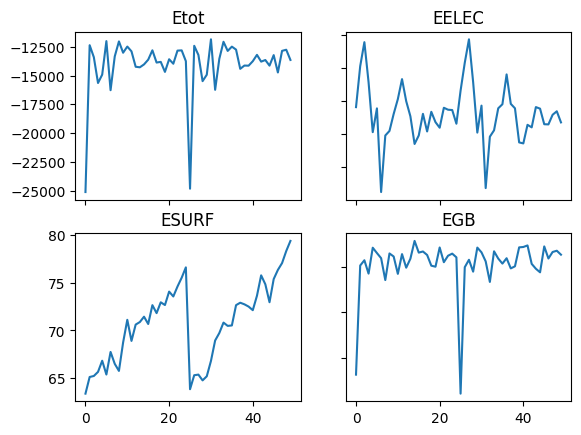

In [37]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(overall['Etot'])
axs[0, 0].set_title('Etot')
axs[0, 1].plot(overall['EELEC'])
axs[0, 1].set_title('EELEC')
axs[1, 0].plot(overall['ESURF'])
axs[1, 0].set_title('ESURF')
axs[1, 1].plot(overall['EGB'])
axs[1, 1].set_title('EGB')
for ax in axs.flat:
    ax.label_outer()